In [13]:
import pandas as pd

# Load data
print("Loading datasets...")
companies = pd.read_csv('C:/Users/Dell/Downloads/companies.csv', encoding='ISO-8859-1')
rounds2 = pd.read_csv('C:/Users/Dell/Downloads/rounds2.csv', encoding='ISO-8859-1')
mapping = pd.read_csv('C:/Users/Dell/Downloads/mapping.csv')
print("Dataset Loaded successfully...")

Loading datasets...
Dataset Loaded successfully...


In [15]:
# Inspect data
print("First few rows of companies data:")
companies.head()

First few rows of companies data:


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [16]:
print("\nFirst few rows of rounds2 data:")
rounds2.head()


First few rows of rounds2 data:


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [17]:
print("\nFirst few rows of mapping data:")
mapping.head()


First few rows of mapping data:


,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [18]:
# List of English-speaking countries
english_speaking_countries = [
    'AUS', 'CAN', 'IND', 'IRL', 'NZL', 'SGP', 'ZAF', 'GBR', 'USA'
]


In [19]:
# Filter investments between 5 to 15 million USD
print("\nFiltering investments between 5 to 15 million USD...")
filtered_rounds = rounds2[
    (rounds2['raised_amount_usd'] >= 5e6) & (rounds2['raised_amount_usd'] <= 15e6)
]
print(f"Number of filtered rounds: {len(filtered_rounds)}")


Filtering investments between 5 to 15 million USD...
Number of filtered rounds: 18848


In [20]:
# Filter companies in English-speaking countries
print("\nFiltering companies in English-speaking countries...")
filtered_companies = companies[companies['country_code'].isin(english_speaking_countries)]
print(f"Number of filtered companies: {len(filtered_companies)}")


Filtering companies in English-speaking countries...
Number of filtered companies: 46399


In [30]:
# Ensure company_permalink keys are in lower case for both datasets to avoid mismatches
print("\nConverting company_permalink and permalink to lower case...")
filtered_companies['permalink'] = filtered_companies['permalink'].str.lower()
filtered_rounds['company_permalink'] = filtered_rounds['company_permalink'].str.lower()
print("company_permalink and permalink is concerted into lower case...")


Converting company_permalink and permalink to lower case...
company_permalink and permalink is concerted into lower case...


C:\Users\Dell\AppData\Local\Temp\ipykernel_7148\1084153789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_companies['permalink'] = filtered_companies['permalink'].str.lower()
C:\Users\Dell\AppData\Local\Temp\ipykernel_7148\1084153789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rounds['company_permalink'] = filtered_rounds['company_permalink'].str.lower()


In [23]:
# Merge the datasets
print("\nMerging the datasets on company_permalink...")
merged_data = pd.merge(filtered_rounds, filtered_companies, how='inner', left_on='company_permalink', right_on='permalink')
print(f"Number of merged records: {len(merged_data)}")



Merging the datasets on company_permalink...
Number of merged records: 15682


In [31]:
# Correct the column names and format in the mapping file for merging
print("\nProcessing the mapping file...")
mapping = pd.melt(mapping, id_vars=['category_list'], var_name='main_sector')
mapping = mapping[mapping['value'] == 1]
mapping = mapping.drop('value', axis=1)
print("Mapping file is processed succesfully..")



Processing the mapping file...
Mapping file is processed succesfully..


In [35]:

# Ensure category_list keys are in lower case for matching
print("\nConverting category_list to lower case for matching...")
mapping['category_list'] = mapping['category_list'].str.lower()
merged_data['category_list'] = merged_data['category_list'].str.lower()
print("category_list is converted into lower case for matching...")



Converting category_list to lower case for matching...
category_list is converted into lower case for matching...


In [26]:
# Map each company's sub-sector to a main sector
print("\nMapping sub-sectors to main sectors...")
merged_data = pd.merge(merged_data, mapping, how='left', left_on='category_list', right_on='category_list')
print(f"Number of records after mapping sectors: {len(merged_data)}")



Mapping sub-sectors to main sectors...
Number of records after mapping sectors: 15682


In [39]:
pip install pandas matplotlib seaborn

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Calculate average investment amount for each type
print("\nAnalyzing investment types...")
investment_type_analysis = merged_data.groupby('funding_round_type')['raised_amount_usd'].mean().reset_index()
investment_type_analysis = investment_type_analysis[
    (investment_type_analysis['raised_amount_usd'] >= 5e6) & (investment_type_analysis['raised_amount_usd'] <= 15e6)
]
print("\nAverage investment amount for each type (filtered between 5 to 15 million USD):")
investment_type_analysis



Analyzing investment types...

Average investment amount for each type (filtered between 5 to 15 million USD):


,funding_round_type,raised_amount_usd
0,angel,7.115747e+06
1,convertible_note,7.864902e+06
2,debt_financing,8.257415e+06
3,equity_crowdfunding,6.559428e+06
4,grant,8.615644e+06
5,non_equity_assistance,1.500000e+07
6,post_ipo_debt,8.696211e+06
7,post_ipo_equity,9.426624e+06
8,private_equity,9.234003e+06
9,product_crowdfunding,9.294506e+06


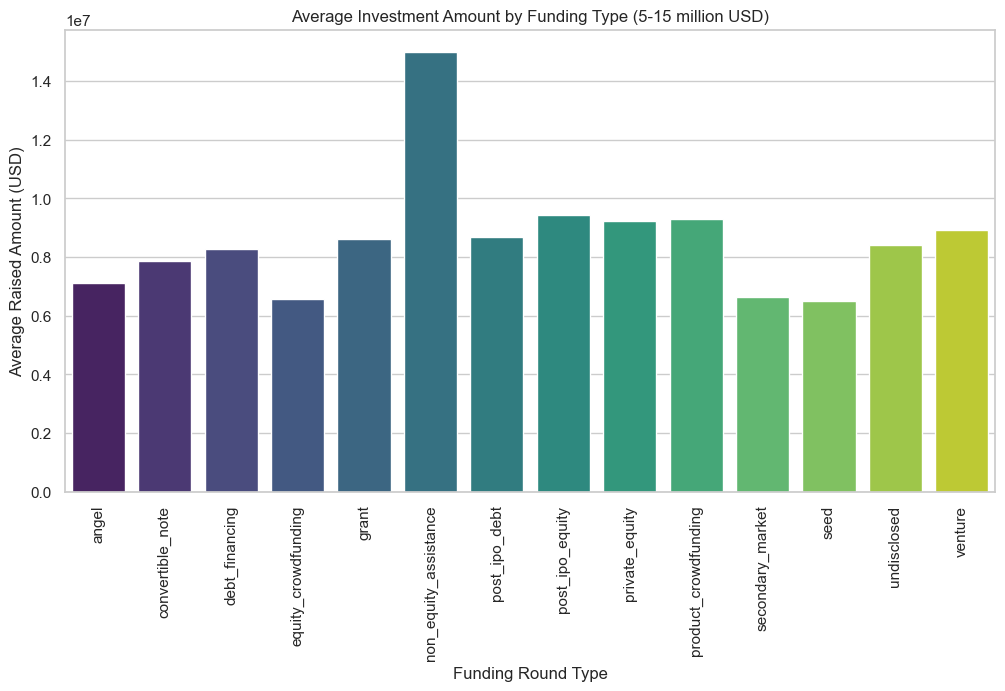

In [42]:

# Plotting
sns.set(style="whitegrid")

# Investment Type Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=investment_type_analysis, palette='viridis')
plt.title('Average Investment Amount by Funding Type (5-15 million USD)')
plt.xlabel('Funding Round Type')
plt.ylabel('Average Raised Amount (USD)')
plt.xticks(rotation=90)
plt.show()

In [37]:
# Aggregate total investment by country
print("\nAnalyzing investments by country...")
country_analysis = merged_data.groupby('country_code')['raised_amount_usd'].sum().reset_index()
country_analysis = country_analysis.sort_values(by='raised_amount_usd', ascending=False)
print("\nTotal investment amount by country (sorted):")
country_analysis



Analyzing investments by country...

Total investment amount by country (sorted):


,country_code,raised_amount_usd
7,USA,1.223976e+11
2,GBR,6.562791e+09
1,CAN,4.348601e+09
3,IND,3.103662e+09
0,AUS,7.144878e+08
6,SGP,7.114312e+08
4,IRL,5.622552e+08
5,NZL,1.582679e+08
8,ZAF,5.148000e+07


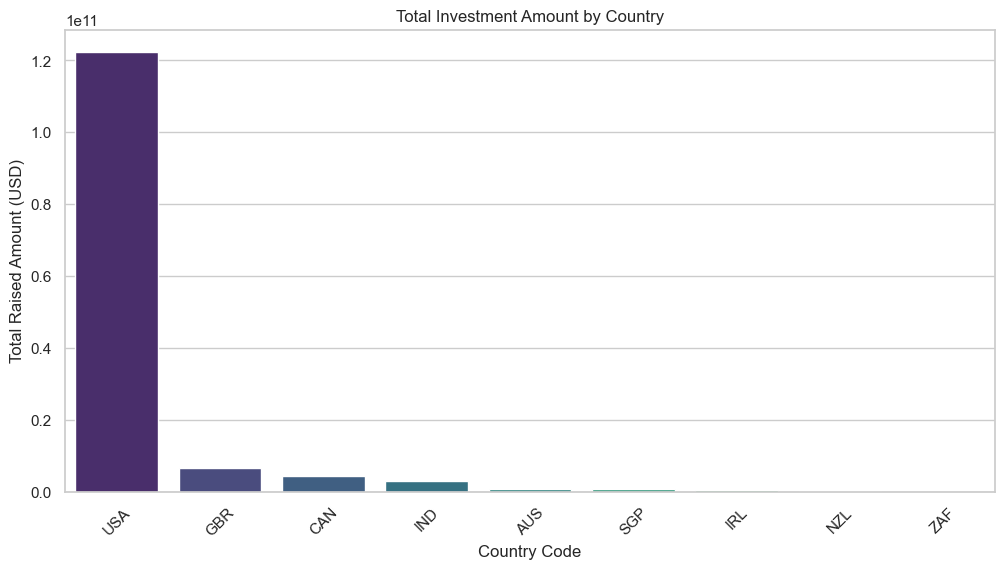

In [43]:
# Country Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='country_code', y='raised_amount_usd', data=country_analysis, palette='viridis')
plt.title('Total Investment Amount by Country')
plt.xlabel('Country Code')
plt.ylabel('Total Raised Amount (USD)')
plt.xticks(rotation=45)
plt.show()


In [38]:
# Aggregate total investment by main sector
print("\nAnalyzing investments by sector...")
sector_analysis = merged_data.groupby('main_sector')['raised_amount_usd'].sum().reset_index()
sector_analysis = sector_analysis.sort_values(by='raised_amount_usd', ascending=False)
print("\nTotal investment amount by main sector (sorted):")
sector_analysis


Analyzing investments by sector...

Total investment amount by main sector (sorted):


,main_sector,raised_amount_usd
7,Others,2.354585e+10
2,Cleantech / Semiconductors,2.178119e+10
4,Health,7.156093e+09
6,"News, Search and Messaging",6.095809e+09
5,Manufacturing,4.928086e+09
8,"Social, Finance, Analytics, Advertising",3.716567e+09
3,Entertainment,2.485601e+09
1,Blanks,1.126596e+09
0,Automotive & Sports,4.374335e+08


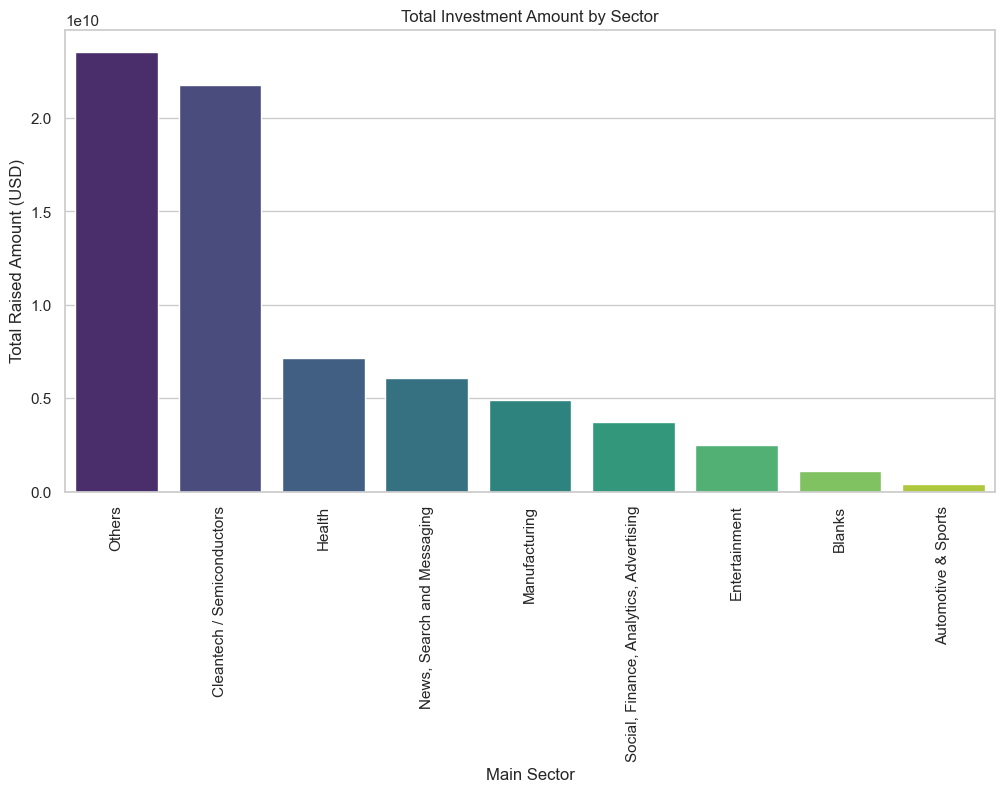

In [45]:
# Sector Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='main_sector', y='raised_amount_usd', data=sector_analysis, palette='viridis')
plt.title('Total Investment Amount by Sector')
plt.xlabel('Main Sector')
plt.ylabel('Total Raised Amount (USD)')
plt.xticks(rotation=90)
plt.show()